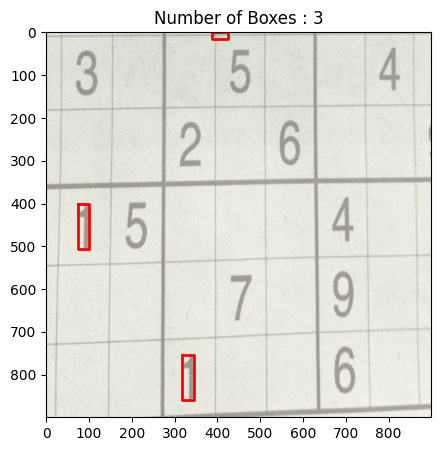

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.measure import label, regionprops
from skimage.color import rgb2gray
from skimage.transform import resize
from PIL import Image

# Load and preprocess the image
sudoku_image = Image.open(r"/content/image1004.jpg")
sudoku_image = np.array(sudoku_image)[350:1170, 75:-65]
sudoku_image = resize(sudoku_image, (900, 900), anti_aliasing=True)

def bounding_box(image):
    # Binarization
    bin_image = rgb2gray(image) > 0.4
    label_im = label(bin_image, background=1)

    # Region Props
    regions = regionprops(label_im)
    fig, ax = plt.subplots(figsize=(5, 5))
    count = 0
    for props in regions:
        minr, minc, maxr, maxc = props.bbox
        area = (maxr - minr) * (maxc - minc)
        # Filtering Box by Area
        if area > 500 and area < 4000:
            bx = (minc, maxc, maxc, minc, minc)
            by = (minr, minr, maxr, maxr, minr)
            ax.plot(bx, by, '-r', linewidth=2)
            count += 1
    # Counting the number of fruits
    ax.set_title("Number of Boxes : {}".format(count))
    ax.imshow(image, alpha=0.5)

bounding_box(sudoku_image)
plt.show()


In [ ]:
pip install pytesseract

In [ ]:
!sudo apt-get install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


<ipython-input-18-7aed405ada24>:19: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -1 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  np.array([
<ipython-input-18-7aed405ada24>:24: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -1 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  np.array([
<ipython-input-18-7aed405ada24>:29: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -1 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  np.array([
<ipython-input-1

Detected Numbers: [1, 2, 3, 4, 5, 6, 7, 8, 9]


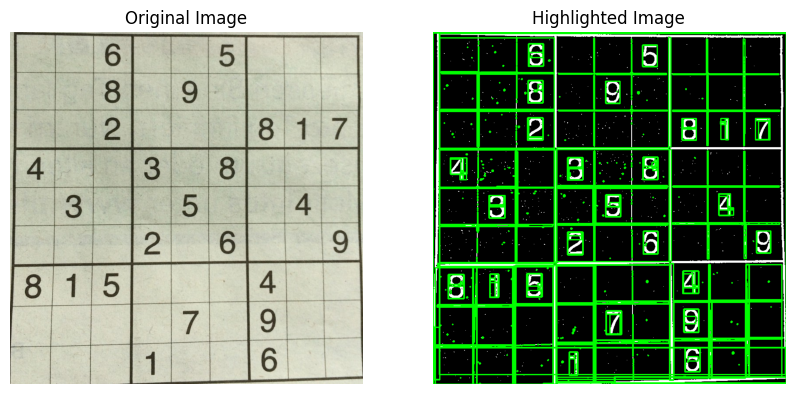

In [ ]:
import cv2
import numpy as np

# Preprocessing
def preprocess_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 7, 4)
    return thresh

# Hit-or-Miss Transform
def hit_or_miss_transform(image, kernel):
    return cv2.morphologyEx(image, cv2.MORPH_HITMISS, kernel)

# Detect Numbers using Hit-and-Miss Transform
def detect_numbers(image):
    # Example kernels for digits 1 to 9
    kernels = [
        np.array([
            [-1, -1, -1],
            [-1,  1, -1],
            [ 1,  1,  1]
        ], dtype=np.uint8),
        np.array([
            [-1, -1,  1],
            [-1,  1, -1],
            [ 1, -1, -1]
        ], dtype=np.uint8),
        np.array([
            [-1, -1,  1],
            [-1,  1,  1],
            [-1, -1,  1]
        ], dtype=np.uint8),
        np.array([
            [-1,  1,  1],
            [-1,  1,  1],
            [-1, -1, -1]
        ], dtype=np.uint8),
        np.array([
            [-1,  1,  1],
            [-1,  1, -1],
            [-1,  1,  1]
        ], dtype=np.uint8),
        np.array([
            [ 1,  1,  1],
            [-1,  1, -1],
            [-1, -1, -1]
        ], dtype=np.uint8),
        np.array([
            [ 1,  1,  1],
            [-1,  1, -1],
            [ 1,  1,  1]
        ], dtype=np.uint8),
        np.array([
            [ 1,  1,  1],
            [ 1,  1,  1],
            [-1, -1, -1]
        ], dtype=np.uint8),
        np.array([
            [ 1, -1, -1],
            [ 1,  1, -1],
            [ 1, -1, -1]
        ], dtype=np.uint8)
    ]

    detected_numbers = []
    highlighted_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    for idx, kernel in enumerate(kernels, start=1):
        hit_miss_result = hit_or_miss_transform(image, kernel)
        contours, _ = cv2.findContours(hit_miss_result, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        if contours:
            detected_numbers.append(idx)  # Append the digit if it's detected
            for contour in contours:
                x, y, w, h = cv2.boundingRect(contour)
                cv2.rectangle(highlighted_image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    return detected_numbers, highlighted_image

# Main Function
def main(image_path):
    image = cv2.imread(image_path)
    preprocessed_image = preprocess_image(image)

    detected_numbers, highlighted_image = detect_numbers(preprocessed_image)
    print("Detected Numbers:", detected_numbers)

     # Display images
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[0].set_title('Original Image')
    axs[0].axis('off')

    axs[1].imshow(cv2.cvtColor(highlighted_image, cv2.COLOR_BGR2RGB))
    axs[1].set_title('Highlighted Image')
    axs[1].axis('off')

    plt.show()

if __name__ == "__main__":
    sudoku_image_path = "/content/image1004.jpg"
    main(sudoku_image_path)


<ipython-input-4-859adfe83622>:28: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -1 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  kernel_1 = np.array([


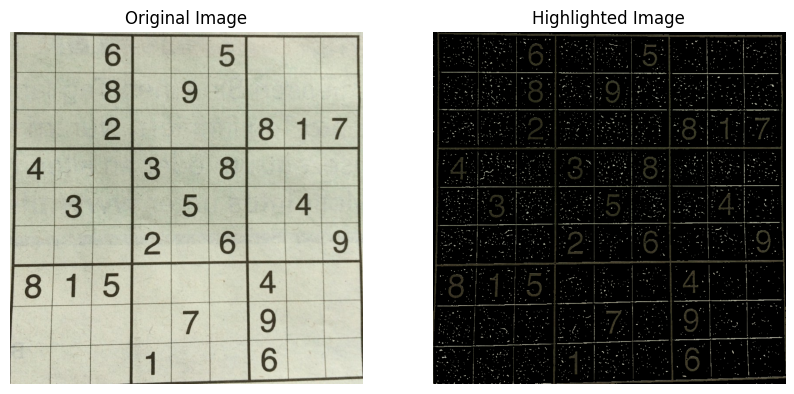

In [ ]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt

# Preprocessing
def preprocess_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    return thresh

# Digit Recognition
def extract_digits(image):
    custom_config = r'--oem 3 --psm 6'
    return pytesseract.image_to_string(image, config=custom_config)

# Hit-or-Miss Transform
def hit_or_miss_transform(image, kernel):
    return cv2.morphologyEx(image, cv2.MORPH_HITMISS, kernel)

# Main Function
def main(image_path):
    image = cv2.imread(image_path)
    preprocessed_image = preprocess_image(image)

    # Example kernel for digit '1'
    kernel_1 = np.array([
        [-1, -1, -1],
        [-1,  1, -1],
        [ 1,  1,  1]
    ], dtype=np.uint8)

    # Perform hit-or-miss transform for digit '1'
    hit_miss_result = hit_or_miss_transform(preprocessed_image, kernel_1)

    # Extract recognized digits
    recognized_digits = extract_digits(preprocessed_image)

    # Highlight the presence of digit '1' in the original image
    highlighted_image = cv2.bitwise_and(image, image, mask=hit_miss_result)

    # Display images
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[0].set_title('Original Image')
    axs[0].axis('off')

    axs[1].imshow(cv2.cvtColor(highlighted_image, cv2.COLOR_BGR2RGB))
    axs[1].set_title('Highlighted Image')
    axs[1].axis('off')

    plt.show()

if __name__ == "__main__":
    sudoku_image_path = "/content/image1004.jpg"
    main(sudoku_image_path)


<ipython-input-6-bc068fbfe0f0>:32: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -1 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  kernel_1 = np.array([


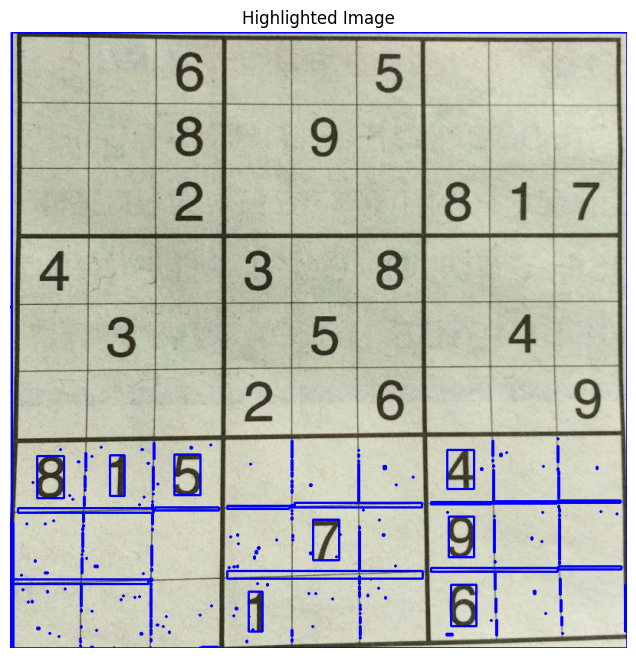

In [ ]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt

# Preprocessing
def preprocess_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 5, 2)
    return thresh

# Digit Recognition
def extract_digits(image):
    custom_config = r'--oem 3 --psm 6'
    return pytesseract.image_to_string(image, config=custom_config)

# Hit-or-Miss Transform
def hit_or_miss_transform(image, kernel):
    return cv2.morphologyEx(image, cv2.MORPH_HITMISS, kernel)

# Draw green rectangle around detected digit
def draw_rectangle_around_digit(image, x, y, w, h):
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)

# Main Function
def main(image_path):
    image = cv2.imread(image_path)
    preprocessed_image = preprocess_image(image)

    # Example kernel for digit '1'
    kernel_1 = np.array([
        [-1, -1, -1],
        [-1,  1, -1],
        [ 1,  1,  1]
    ], dtype=np.uint8)

    # Perform hit-or-miss transform for digit '1'
    hit_miss_result = hit_or_miss_transform(preprocessed_image, kernel_1)

    # Extract recognized digits
    recognized_digits = extract_digits(preprocessed_image)

    # Find contours of detected digits
    contours, _ = cv2.findContours(hit_miss_result, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw green rectangle around each detected digit
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        draw_rectangle_around_digit(image, x, y, w, h)

    # Display images
    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Highlighted Image')
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    sudoku_image_path = "/content/image1004.jpg"
    main(sudoku_image_path)


In [ ]:
def detect_numbers(image):
    # Example kernels for digits 1 to 9
    kernels = [
        np.array([
            [-1, -1, -1],
            [-1,  1, -1],
            [ 1,  1,  1]
        ], dtype=np.uint8),
        np.array([
            [-1, -1,  1],
            [-1,  1, -1],
            [ 1, -1, -1]
        ], dtype=np.uint8),
        np.array([
            [-1, -1,  1],
            [-1,  1,  1],
            [-1, -1,  1]
        ], dtype=np.uint8),
        np.array([
            [-1,  1,  1],
            [-1,  1,  1],
            [-1, -1, -1]
        ], dtype=np.uint8),
        np.array([
            [-1,  1,  1],
            [-1,  1, -1],
            [-1,  1,  1]
        ], dtype=np.uint8),
        np.array([
            [ 1,  1,  1],
            [-1,  1, -1],
            [-1, -1, -1]
        ], dtype=np.uint8),
        np.array([
            [ 1,  1,  1],
            [-1,  1, -1],
            [ 1,  1,  1]
        ], dtype=np.uint8),
        np.array([
            [ 1,  1,  1],
            [ 1,  1,  1],
            [-1, -1, -1]
        ], dtype=np.uint8),
        np.array([
            [ 1, -1, -1],
            [ 1,  1, -1],
            [ 1, -1, -1]
        ], dtype=np.uint8)
    ]
    detected_numbers = []
    for idx, kernel in enumerate(kernels, start=1):
        hit_miss_result = hit_or_miss_transform(image, kernel)
        contours, _ = cv2.findContours(hit_miss_result, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        if contours:
            detected_numbers.append(idx)  # Append the digit if it's detected
            for contour in contours:
                x, y, w, h = cv2.boundingRect(contour)
                cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    return detected_numbers, image


largest grid


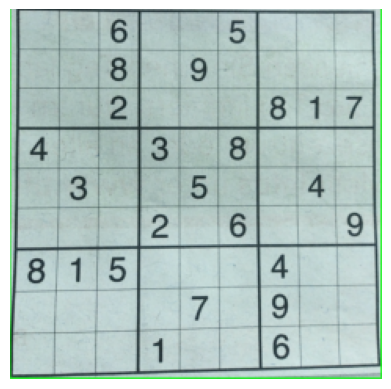

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the input image
image = cv2.imread("/content/d.png")

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur and adaptive thresholding to preprocess the image
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Find contours in the thresholded image
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the largest contour (assumed to be the Sudoku grid)
largest_contour = max(contours, key=cv2.contourArea)

# Approximate the contour to a polygon
epsilon = 0.1 * cv2.arcLength(largest_contour, True)
approx_polygon = cv2.approxPolyDP(largest_contour, epsilon, True)

# Check if the approximated contour has four corners (indicating the Sudoku grid)
if len(approx_polygon) == 4:
    # Get the bounding rectangle of the contour
    x, y, w, h = cv2.boundingRect(approx_polygon)

    # Crop the image to extract the Sudoku grid
    sudoku_grid = image[y:y+h, x:x+w]

    # Display the cropped Sudoku grid using Matplotlib
    plt.imshow(cv2.cvtColor(sudoku_grid, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
else:
    print("Sudoku grid not found in the image.")


In [ ]:
!apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (5,043 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 121752 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

Detected Sudoku:
0 0 0 | 0 0 0 | 0 0 0 
0 0 0 | 0 0 19 | 0 0 0 
0 0 0 | 0 4 0 | 0 2 0 
---------------------
0 0 4 | 0 0 0 | 0 0 0 
0 0 0 | 0 2 0 | 0 0 0 
0 0 0 | 0 0 0 | 0 0 4 
---------------------
4 1 0 | 0 0 0 | 1 0 0 
0 0 0 | 0 0 0 | 0 0 0 
0 0 0 | 0 0 0 | 0 0 0 


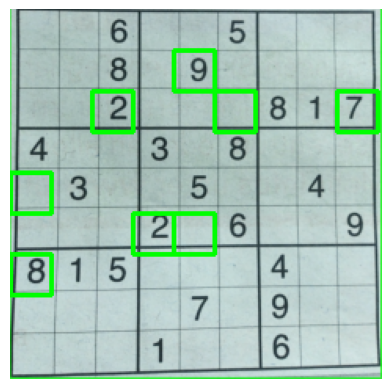

In [ ]:
import cv2
import pytesseract
import numpy as np
import matplotlib.pyplot as plt

# Function to preprocess the image
def preprocess_image(image):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    # Adaptive thresholding to binarize the image
    thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    return thresh

# Function to detect numbers inside each cell of the grid
def detect_numbers_in_cells(image, rows, cols):
    detected_numbers = []
    detected_cells = []
    height, width = image.shape[:2]
    cell_height, cell_width = height // rows, width // cols

    # Loop through each cell of the grid
    for i in range(rows):
        for j in range(cols):
            # Define the coordinates of the current cell
            x1, y1 = j * cell_width, i * cell_height
            x2, y2 = (j + 1) * cell_width, (i + 1) * cell_height
            # Extract the region of interest (ROI) for the current cell
            cell_roi = image[y1:y2, x1:x2]
            # Use pytesseract to detect text (numbers) in the cell
            detected_text = pytesseract.image_to_string(cell_roi, config='--psm 10 --oem 3 -c tessedit_char_whitelist=0123456789')
            # Append the detected number to the list
            detected_number = int(detected_text.strip()) if detected_text.strip().isdigit() else 0
            detected_numbers.append(detected_number)
            if detected_number != 0:
                detected_cells.append((x1, y1, x2, y2))

    return detected_numbers, detected_cells

# Function to highlight the detected grids in the original image
def highlight_detected_grids(image, detected_cells):
    highlighted_image = image.copy()
    for cell in detected_cells:
        x1, y1, x2, y2 = cell
        cv2.rectangle(highlighted_image, (x1, y1), (x2, y2), (0, 255, 0), 2)
    return highlighted_image

image=sudoku_grid

# Preprocess the image
preprocessed_image = preprocess_image(image)

# Define the number of rows and columns for the grid
rows, cols = 9, 9

# Detect numbers inside each cell of the grid
detected_numbers, detected_cells = detect_numbers_in_cells(preprocessed_image, rows, cols)

# Print the detected numbers as a Sudoku grid
print("Detected Sudoku:")
for i in range(9):
    if i % 3 == 0 and i != 0:
        print("-" * 21)
    for j in range(9):
        if j % 3 == 0 and j != 0:
            print("|", end=" ")
        print(detected_numbers[i * 8 + j], end=" ")
    print()

# Highlight the detected grids in the original image
highlighted_image = highlight_detected_grids(image, detected_cells)

# Display the original image with highlighted grids
plt.imshow(cv2.cvtColor(highlighted_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

<ipython-input-67-7b3b0ce8e1bc>:35: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -1 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  np.array([
<ipython-input-67-7b3b0ce8e1bc>:40: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -1 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  np.array([
<ipython-input-67-7b3b0ce8e1bc>:45: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -1 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  np.array([
<ipython-input-6

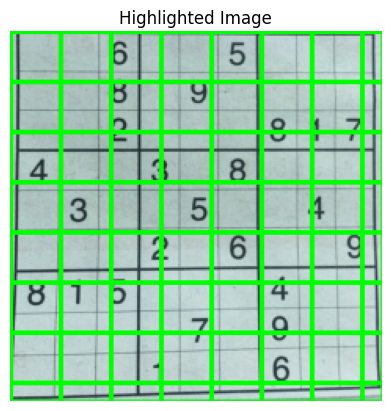

Detected Numbers: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81]


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    _, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    return thresh

def hit_or_miss_detection(cell, kernels):
    gray = cv2.cvtColor(cell, cv2.COLOR_BGR2GRAY)
    results = []
    for kernel in kernels:
        # Perform hit or miss detection
        result = cv2.morphologyEx(gray, cv2.MORPH_HITMISS, kernel)
        results.append(result)
    return results

def detect_in_small_grids(image, kernels):
    detections = []
    for cell_index, cell in enumerate(image):
        results = hit_or_miss_detection(cell, kernels)
        for result in results:
            if np.sum(result) > 0:
                detections.append(cell)
                break  # Stop checking other kernels once a hit is found
    return detections

def main():
    image = sudoku_grid
    partitioned_cells = np.array_split(image, 81)

    kernels = [
        np.array([
            [-1, -1, -1],
            [-1,  1, -1],
            [ 1,  1,  1]
        ], dtype=np.uint8),
        np.array([
            [-1, -1,  1],
            [-1,  1, -1],
            [ 1, -1, -1]
        ], dtype=np.uint8),
        np.array([
            [-1, -1,  1],
            [-1,  1,  1],
            [-1, -1,  1]
        ], dtype=np.uint8),
        np.array([
            [-1,  1,  1],
            [-1,  1,  1],
            [-1, -1, -1]
        ], dtype=np.uint8),
        np.array([
            [-1,  1,  1],
            [-1,  1, -1],
            [-1,  1,  1]
        ], dtype=np.uint8),
        np.array([
            [ 1,  1,  1],
            [-1,  1, -1],
            [-1, -1, -1]
        ], dtype=np.uint8),
        np.array([
            [ 1,  1,  1],
            [-1,  1, -1],
            [ 1,  1,  1]
        ], dtype=np.uint8),
        np.array([
            [ 1,  1,  1],
            [ 1,  1,  1],
            [-1, -1, -1]
        ], dtype=np.uint8),
        np.array([
            [ 1, -1, -1],
            [ 1,  1, -1],
            [ 1, -1, -1]
        ], dtype=np.uint8)
    ]

    detections = detect_in_small_grids(partitioned_cells, kernels)

    highlighted_image = image.copy()
    detected_numbers = []
    for i, cell in enumerate(partitioned_cells):
        results = hit_or_miss_detection(cell, kernels)
        for result in results:
            if np.sum(result) > 0:
                x, y = (i % 9) * 32, (i // 9) * 32
                cv2.rectangle(highlighted_image, (x, y), (x + 32, y + 32), (0, 255, 0), 2)
                detected_numbers.append(i + 1)
                break  # Stop checking other kernels once a hit is found

    plt.imshow(cv2.cvtColor(highlighted_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Highlighted Image')
    plt.show()

    print("Detected Numbers:", detected_numbers)

if __name__ == "__main__":
    image_path = "your_image_path.jpg"
    main()


In [ ]:
!sudo apt-get install tesseract-ocr
!pip install pytesseract

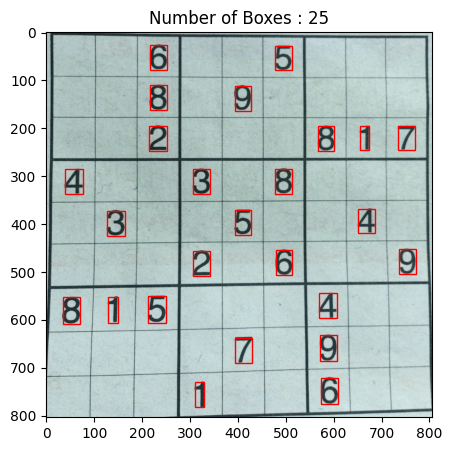

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from skimage.io import imread, imshow
from skimage.measure import label, regionprops, regionprops_table
from skimage.color import rgb2gray
from skimage.transform import resize

def bounding_box(image):
    # Convert RGBA image to RGB
    if image.shape[2] == 4:
        image = image[:, :, :3]

    # Binarization
    bin_image = rgb2gray(image) > 0.5
    label_im = label(bin_image, background=1)

    # Region Props
    regions = regionprops(label_im)

    count = 0
    fig, ax = plt.subplots(figsize=(5,5))
    ax.imshow(image)

    for props in regions:
        minr, minc, maxr, maxc = props.bbox
        area = (maxr - minr)*(maxc - minc)
        if area > 500 and area < 4000:
            rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr, fill=False, edgecolor='red', linewidth=1)
            ax.add_patch(rect)
            count += 1

    ax.set_title("Number of Boxes : {}".format(count))
    plt.show()

sudoku_image = cv2.imread('/content/image1004.jpg')

bounding_box(sudoku_image)


In [ ]:
!sudo apt-get install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


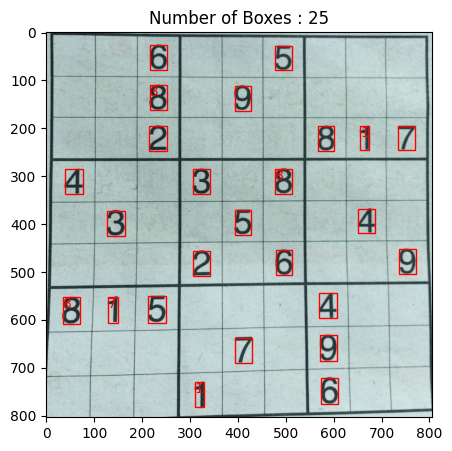

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.measure import label, regionprops
from skimage.color import rgb2gray
from skimage.transform import resize
import pytesseract

def detect_numbers_in_boxes(image, regions):
    detected_numbers = []
    for props in regions:
        minr, minc, maxr, maxc = props.bbox
        # Crop the region of interest (ROI) from the original image
        roi = image[minr:maxr, minc:maxc]
        # Convert the ROI to grayscale
        roi_gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
        # Thresholding to enhance text
        _, roi_thresh = cv2.threshold(roi_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
        # Use OCR to recognize the numbers
        number = pytesseract.image_to_string(roi_thresh, config='--psm 10 --oem 3 -c tessedit_char_whitelist=0123456789')
        detected_numbers.append(number.strip() if number.strip().isdigit() else '')
    return detected_numbers

def bounding_box(image):
    # Convert RGBA image to RGB
    if image.shape[2] == 4:
        image = image[:, :, :3]

    # Binarization
    bin_image = rgb2gray(image) > 0.5
    label_im = label(bin_image, background=1)

    # Region Props
    regions = regionprops(label_im)

    count = 0
    fig, ax = plt.subplots(figsize=(5,5))
    ax.imshow(image)

    detected_numbers = detect_numbers_in_boxes(image, regions)

    for props, number in zip(regions, detected_numbers):
        minr, minc, maxr, maxc = props.bbox
        area = (maxr - minr)*(maxc - minc)
        if area > 500 and area < 4000:
            rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr, fill=False, edgecolor='red', linewidth=1)
            ax.add_patch(rect)
            ax.text(minc, minr, number, color='red', fontsize=10, verticalalignment='top')
            count += 1

    ax.set_title("Number of Boxes : {}".format(count))
    plt.show()

sudoku_image = cv2.imread('/content/image1004.jpg')

bounding_box(sudoku_image)


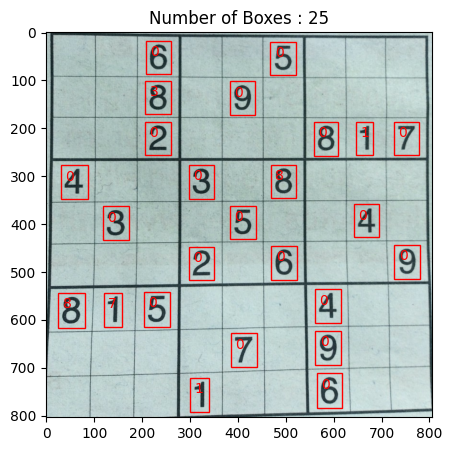

Sudoku Grid:
0 0 0 0 0 0 0 0 0 
0 0 3 0 0 0 0 0 0 
0 0 0 0 0 0 0 1 0 
0 0 0 0 0 8 0 0 0 
0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 
8 7 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 
0 0 0 1 0 0 0 0 0 


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.measure import label, regionprops
from skimage.color import rgb2gray
from skimage.transform import resize

def detect_numbers_in_boxes(image, regions):
    detected_numbers = []
    for props in regions:
        minr, minc, maxr, maxc = props.bbox
        # Crop the region of interest (ROI) from the original image
        roi = image[minr:maxr, minc:maxc]
        # Convert the ROI to grayscale
        roi_gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
        # Thresholding to enhance text
        _, roi_thresh = cv2.threshold(roi_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
        # Use OCR to recognize the numbers
        number = pytesseract.image_to_string(roi_thresh, config='--psm 10 --oem 3 -c tessedit_char_whitelist=0123456789')
        detected_numbers.append(number.strip() if number.strip().isdigit() else '0')
    return detected_numbers

def bounding_box(image):
    # Convert RGBA image to RGB
    if image.shape[2] == 4:
        image = image[:, :, :3]

    # Binarization
    bin_image = rgb2gray(image) > 0.5
    label_im = label(bin_image, background=1)

    # Region Props
    regions = regionprops(label_im)

    count = 0
    fig, ax = plt.subplots(figsize=(5,5))
    ax.imshow(image)

    detected_numbers = detect_numbers_in_boxes(image, regions)

    sudoku_grid = np.zeros((9, 9), dtype=int)

    for props, number in zip(regions, detected_numbers):
        minr, minc, maxr, maxc = props.bbox
        area = (maxr - minr)*(maxc - minc)
        if area > 500 and area < 4000:
            row = (minr + maxr) // 2 // (image.shape[0] // 9)
            col = (minc + maxc) // 2 // (image.shape[1] // 9)
            sudoku_grid[row, col] = int(number)

            # Increase the size of the red box to cover a larger portion of the grid
            rect = plt.Rectangle((minc-9, minr-9), maxc - minc+18, maxr - minr+18, fill=False, edgecolor='red', linewidth=1)
            ax.add_patch(rect)
            ax.text(minc, minr, number, color='red', fontsize=10, verticalalignment='top')
            count += 1

    ax.set_title("Number of Boxes : {}".format(count))
    plt.show()

    print("Sudoku Grid:")
    for i in range(9):
        for j in range(9):
            print(sudoku_grid[i, j], end=" ")
        print()

sudoku_image = cv2.imread('/content/image1004.jpg')

bounding_box(sudoku_image)


In [ ]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

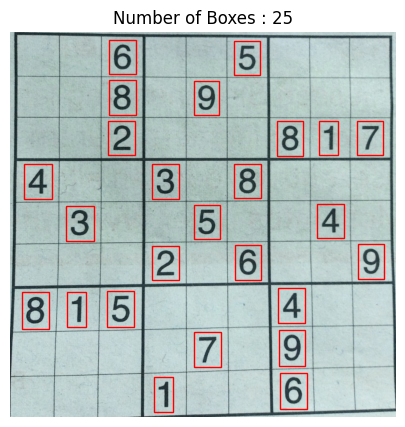

Detected Sudoku:
0 0 0 | 0 0 0 | 0 0 0 
0 0 0 | 0 0 0 | 0 0 0 
0 0 2 | 0 0 0 | 0 1 0 
---------------------
4 0 0 | 3 0 0 | 0 0 0 
0 3 0 | 0 0 0 | 0 4 0 
0 0 0 | 2 0 5 | 0 0 0 
---------------------
8 1 0 | 0 0 0 | 4 0 0 
0 0 0 | 0 0 0 | 0 0 0 
0 0 0 | 1 0 0 | 6 0 0 


In [62]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pytesseract
from skimage.measure import label, regionprops
from skimage.color import rgb2gray
from skimage.transform import resize

def bounding_box(image):
    # Convert RGBA image to RGB
    if image.shape[2] == 4:
        image = image[:, :, :3]

    # Binarization
    bin_image = rgb2gray(image) > 0.5
    label_im = label(bin_image, background=1)

    # Region Props
    regions = regionprops(label_im)

    count = 0
    fig, ax = plt.subplots(figsize=(5,5))
    ax.imshow(image)

    sudoku_grid = np.zeros((9, 9), dtype=int)

    for props in regions:
        minr, minc, maxr, maxc = props.bbox
        area = (maxr - minr)*(maxc - minc)
        if area > 500 and area < 4000:
            row = (minr + maxr) // 2 // (image.shape[0] // 9)
            col = (minc + maxc) // 2 // (image.shape[1] // 9)
            roi = image[minr:maxr, minc:maxc]
            detected_number = pytesseract.image_to_string(roi, config = '--psm 6 --oem 3 -c tessedit_char_whitelist=0123456789 -l eng')
            sudoku_grid[row, col] = int(detected_number.strip()) if detected_number.strip().isdigit() else 0

            # Increase the size of the red box to cover a larger portion of the grid
            rect = plt.Rectangle((minc-10, minr-10), maxc - minc+20, maxr - minr+20, fill=False, edgecolor='red', linewidth=1)
            ax.add_patch(rect)
            count += 1

    ax.set_title("Number of Boxes : {}".format(count))
    plt.axis('off')
    plt.show()

    print("Detected Sudoku:")
    for i in range(9):
        if i % 3 == 0 and i != 0:
            print("-" * 21)
        for j in range(9):
            if j % 3 == 0 and j != 0:
                print("|", end=" ")
            print(sudoku_grid[i, j], end=" ")
        print()

sudoku_image = cv2.imread('/content/image1004.jpg')

bounding_box(sudoku_image)
